In [1]:
import zipfile
import pandas as pd
import os
from google.colab import drive

# Step 1: Mount Google Drive
drive.mount('/content/drive')

# Step 2: Define path to ZIP file in your Google Drive
zip_path = '/content/drive/My Drive/sudoku.csv.zip'
extract_path = '/content/sudoku_data'  # where we'll extract the zip

# Step 3: Unzip the file
os.makedirs(extract_path, exist_ok=True)
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

# Step 4: Find and read the extracted CSV
csv_file_path = os.path.join(extract_path, 'sudoku.csv')
sudoku_games = pd.read_csv(csv_file_path)

# Step 5: Display dataset info
print(f"\n✅ Dataset Info:")
print(f"Shape: {sudoku_games.shape}")
print(f"Columns: {sudoku_games.columns.tolist()}")
print(f"Memory usage: {sudoku_games.memory_usage(deep=True).sum() / 1024**2:.2f} MB")

# Step 6: Show first few rows
print(f"\n🧩 First 5 rows:")
sudoku_games.head()


Mounted at /content/drive

✅ Dataset Info:
Shape: (9000000, 2)
Columns: ['puzzle', 'solution']
Memory usage: 2368.93 MB

🧩 First 5 rows:


,puzzle,solution
0,0700000430400096108006349000940520003584600200...,6795182435437296188216349577943521863584617292...
1,3010865040465210705000000014008000020803479000...,3719865248465213795924738614638197522853479167...
2,0483015603600080909106700030200009355090102006...,7483915623652487919126754834217869355894132766...
3,0083170000042051090000400703271609049014500000...,2983176457642851391539462783271689549814537266...
4,0408906300001368208007405190004670524500207002...,1428956379751368248367425193984671524513287962...


In [3]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import tensorflow as tf

# Your existing data processing (optimized version)
print("🔄 Processing Sudoku dataset...")

# Let's start with a smaller subset for faster processing and testing
# You can increase this number once everything works
SAMPLE_SIZE = 500000  # Start with 50k samples instead of 1M

all_puzzles = []
all_solutions = []

print(f"Processing {SAMPLE_SIZE:,} samples...")

for i in range(SAMPLE_SIZE):
    if i % 10000 == 0:
        print(f"  Processed {i:,} samples...")

    # Convert string to numpy array and reshape to 9x9
    puzzle = np.array([int(d) for d in sudoku_games.iloc[i, 0]]).reshape(9, 9)
    solution = np.array([int(d) for d in sudoku_games.iloc[i, 1]]).reshape(9, 9)

    all_puzzles.append(puzzle)
    all_solutions.append(solution)

print("✅ Data processing complete!")

# Convert to numpy arrays
X = np.array(all_puzzles)  # shape (num_samples, 9, 9)
y = np.array(all_solutions)  # shape (num_samples, 9, 9)

print(f"📊 Dataset shapes:")
print(f"  Puzzles (X): {X.shape}")
print(f"  Solutions (y): {y.shape}")

# Check sample data
print(f"\n🔍 Sample puzzle:")
print(X[0])
print(f"\n🎯 Sample solution:")
print(y[0])

# Prepare data for the model
print(f"\n🛠️  Preparing data for training...")

# Reshape X for model input (add channel dimension)
X_model = X.reshape(-1, 9, 9, 1).astype(np.float32)

# Prepare y for classification
# Your model outputs 729 values (9*9*9), so we need to prepare labels accordingly
# Each puzzle has 81 cells, each cell predicts one of 9 digits (1-9)
# We need to convert each cell's solution to its position in the flattened output

y_model = []
for puzzle_solution in y:
    # For each 9x9 solution, create labels for the 729-dimensional output
    puzzle_labels = []
    for i in range(9):
        for j in range(9):
            digit = puzzle_solution[i, j]  # This is 1-9
            # Convert to class index: digit 1-9 becomes class 0-8
            # Position in 729-dim vector: cell_index * 9 + class_index
            cell_index = i * 9 + j  # 0-80 for the 81 cells
            class_index = digit - 1  # Convert 1-9 to 0-8
            puzzle_labels.append(class_index)
    y_model.append(puzzle_labels)

y_model = np.array(y_model)  # Shape: (samples, 81) - each row has 81 class labels

print(f"📈 Model-ready data shapes:")
print(f"  X_model: {X_model.shape}")
print(f"  y_model: {y_model.shape}")
print(f"  X_model dtype: {X_model.dtype}")
print(f"  y_model range: [{y_model.min()}, {y_model.max()}]")

# Split data
print(f"\n✂️  Splitting data...")
X_train, X_val, y_train, y_val = train_test_split(
    X_model, y_model,
    test_size=0.2,
    random_state=42,
    shuffle=True
)

print(f"🎯 Training data:")
print(f"  X_train: {X_train.shape}")
print(f"  y_train: {y_train.shape}")
print(f"  X_val: {X_val.shape}")
print(f"  y_val: {y_val.shape}")

# Memory usage check
total_memory = (X_train.nbytes + y_train.nbytes + X_val.nbytes + y_val.nbytes) / 1024**2
print(f"\n💾 Total memory usage: {total_memory:.2f} MB")
print("hi")
print(f"\n🚀 Data is ready for training!")
print(f"   Use X_train, y_train for training")
print(f"   Use X_val, y_val for validation")

🔄 Processing Sudoku dataset...
Processing 500,000 samples...
  Processed 0 samples...
  Processed 10,000 samples...
  Processed 20,000 samples...
  Processed 30,000 samples...
  Processed 40,000 samples...
  Processed 50,000 samples...
  Processed 60,000 samples...
  Processed 70,000 samples...
  Processed 80,000 samples...
  Processed 90,000 samples...
  Processed 100,000 samples...
  Processed 110,000 samples...
  Processed 120,000 samples...
  Processed 130,000 samples...
  Processed 140,000 samples...
  Processed 150,000 samples...
  Processed 160,000 samples...
  Processed 170,000 samples...
  Processed 180,000 samples...
  Processed 190,000 samples...
  Processed 200,000 samples...
  Processed 210,000 samples...
  Processed 220,000 samples...
  Processed 230,000 samples...
  Processed 240,000 samples...
  Processed 250,000 samples...
  Processed 260,000 samples...
  Processed 270,000 samples...
  Processed 280,000 samples...
  Processed 290,000 samples...
  Processed 300,000 samp

In [4]:
# BLOCK 4: Fixed Sudoku Model Setup
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv2D, Dense, Flatten, Concatenate, Layer, Reshape, Softmax
from tensorflow.keras.optimizers import Adam

# Custom layer for resizing (same as before)
class ResizeLayer(Layer):
    def __init__(self, target_size, **kwargs):
        super(ResizeLayer, self).__init__(**kwargs)
        self.target_size = target_size

    def call(self, inputs):
        return tf.image.resize(inputs, self.target_size)

    def get_config(self):
        config = super(ResizeLayer, self).get_config()
        config.update({'target_size': self.target_size})
        return config

def create_fixed_sudoku_model():
    """
    Create a Sudoku model that outputs 81 separate predictions (one per cell)
    Each cell predicts one of 9 digits
    """
    input_layer = Input(shape=(9, 9, 1))

    # First layer convolutions
    conv_3x3 = Conv2D(9, (3, 3), padding='same', activation='relu')(input_layer)
    conv_9x1 = Conv2D(9, (9, 1), padding='valid', activation='relu')(input_layer)
    conv_9x1 = ResizeLayer((9, 9))(conv_9x1)
    conv_1x9 = Conv2D(9, (1, 9), padding='valid', activation='relu')(input_layer)
    conv_1x9 = ResizeLayer((9, 9))(conv_1x9)
    conv_9x9 = Conv2D(1, (9, 9), padding='valid', activation='relu')(input_layer)
    conv_9x9 = ResizeLayer((9, 9))(conv_9x9)

    concat1 = Concatenate()([conv_3x3, conv_9x1, conv_1x9, conv_9x9])

    # Second layer
    conv_global2 = Conv2D(18, (9, 9), padding='valid', activation='relu')(concat1)
    conv_global2_resized = ResizeLayer((9, 9))(conv_global2)
    conv_local2 = Conv2D(9, (3, 3), padding='same', activation='relu')(concat1)
    conv_1x1_2 = Conv2D(1, (1, 1), padding='same', activation='relu')(concat1)
    concat2 = Concatenate(axis=-1)([conv_local2, conv_global2_resized, conv_1x1_2])

    # Third layer
    conv_global3 = Conv2D(18, (9, 9), padding='valid', activation='relu')(concat2)
    conv_global3_resized = ResizeLayer((9, 9))(conv_global3)
    conv_local3 = Conv2D(9, (3, 3), padding='same', activation='relu')(concat2)
    conv_1x1_3 = Conv2D(1, (1, 1), padding='same', activation='relu')(concat2)
    concat3 = Concatenate(axis=-1)([conv_local3, conv_global3_resized, conv_1x1_3])

    conv_global4 = Conv2D(18, (9, 9), padding='valid', activation='relu')(concat3)
    conv_global4_resized = ResizeLayer((9, 9))(conv_global4)
    conv_local4 = Conv2D(9, (3, 3), padding='same', activation='relu')(concat3)
    conv_1x1_4 = Conv2D(1, (1, 1), padding='same', activation='relu')(concat3)
    concat4 = Concatenate(axis=-1)([conv_local4, conv_global4_resized, conv_1x1_4])

    conv_global5 = Conv2D(18, (9, 9), padding='valid', activation='relu')(concat4)
    conv_global5_resized = ResizeLayer((9, 9))(conv_global5)
    conv_local5 = Conv2D(9, (3, 3), padding='same', activation='relu')(concat4)
    conv_1x1_5 = Conv2D(1, (1, 1), padding='same', activation='relu')(concat4)
    concat5 = Concatenate(axis=-1)([conv_local5, conv_global5_resized, conv_1x1_5])
    # Flatten and dense layers
    flat = Flatten()(concat3)
    dense1 = Dense(512, activation='relu')(flat)
    dense2 = Dense(256, activation='relu')(dense1)

    # ✅ Added layers
    dense3 = Dense(128, activation='relu')(dense2)
    dense4 = Dense(250, activation='relu')(dense3)

    # Output: 81 cells, each with 9 possible digits
    # Reshape to (81, 9) then apply softmax to each cell
    output_logits = Dense(81 * 9, activation='linear')(dense2)
    output_reshaped = Reshape((81, 9))(output_logits)
    output = Softmax(axis=-1)(output_reshaped)  # Use Keras Softmax layer instead of tf.nn.softmax

    return Model(inputs=input_layer, outputs=output)

# Create and compile the fixed model
print("🏗️  Creating fixed Sudoku model...")
sudoku_model_fixed = create_fixed_sudoku_model()

# Use sparse categorical crossentropy for multi-class classification
sudoku_model_fixed.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

print("✅ Model created and compiled!")
sudoku_model_fixed.summary()

# Fix the data normalization (your current X_model has values 0-9, need 0-1)
print("\n🔧 Fixing data normalization...")
X_train_fixed = X_train.astype(np.float32) / 9.0  # Normalize 0-9 to 0-1
X_val_fixed = X_val.astype(np.float32) / 9.0

print(f"📊 Fixed data ranges:")
print(f"  X_train_fixed: [{X_train_fixed.min():.3f}, {X_train_fixed.max():.3f}]")
print(f"  y_train: [{y_train.min()}, {y_train.max()}]")

print(f"\n🚀 Ready to train! Data shapes:")
print(f"  X_train_fixed: {X_train_fixed.shape}")
print(f"  y_train: {y_train.shape}")
print(f"  X_val_fixed: {X_val_fixed.shape}")
print(f"  y_val: {y_val.shape}")

🏗️  Creating fixed Sudoku model...
✅ Model created and compiled!


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 9, 9, 1)   │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_1 (Conv2D)   │ (None, 1, 9, 9)   │         90 │ input_layer[0][0] │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_2 (Conv2D)   │ (None, 9, 1, 9)   │         90 │ input_layer[0][0] │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_3 (Conv2D)   │ (None, 1, 1, 1)   │         82 │ input_layer[0][0] │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d (Conv2D)     │ (None, 9, 9, 9)   │         90 │ input_layer[0][0] │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ resize_layer        │ (None, 9, 9, 9)   │          0 │ conv2d_1[0][0]    │
│ (ResizeLayer)       │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ resize_layer_1      │ (None, 9, 9, 9)   │          0 │ conv2d_2[0][0]    │
│ (ResizeLayer)       │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ resize_layer_2      │ (None, 9, 9, 1)   │          0 │ conv2d_3[0][0]    │
│ (ResizeLayer)       │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate         │ (None, 9, 9, 28)  │          0 │ conv2d[0][0],     │
│ (Concatenate)       │                   │            │ resize_layer[0][… │
│                     │                   │            │ resize_layer_1[0… │
│                     │                   │            │ resize_layer_2[0… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_4 (Conv2D)   │ (None, 1, 1, 18)  │     40,842 │ concatenate[0][0] │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_5 (Conv2D)   │ (None, 9, 9, 9)   │      2,277 │ concatenate[0][0] │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ resize_layer_3      │ (None, 9, 9, 18)  │          0 │ conv2d_4[0][0]    │
│ (ResizeLayer)       │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_6 (Conv2D)   │ (None, 9, 9, 1)   │         29 │ concatenate[0][0] │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate_1       │ (None, 9, 9, 28)  │          0 │ conv2d_5[0][0],   │
│ (Concatenate)       │                   │            │ resize_layer_3[0… │
│                     │                   │            │ conv2d_6[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_7 (Conv2D)   │ (None, 1, 1, 18)  │     40,842 │ concatenate_1[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_8 (Conv2D)   │ (None, 9, 9, 9)   │      2,277 │ concatenate_1[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ resize_layer_4      │ (None, 9, 9, 18)  │          0 │ conv2d_7[0][0]    │
│ (ResizeLayer)       │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_9 (Conv2D)   │ (None, 9, 9, 1)   │         29 │ concatenate_1[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate_2       │ (None, 9, 9, 28)  │          0 │ conv2d_8[0][0],   │
│ (Concatenate)       │                   │            │ resize_layer_4[0

 Total params: 1,567,057 (5.98 MB)

 Trainable params: 1,567,057 (5.98 MB)

 Non-trainable params: 0 (0.00 B)


🔧 Fixing data normalization...
📊 Fixed data ranges:
  X_train_fixed: [0.000, 1.000]
  y_train: [0, 8]

🚀 Ready to train! Data shapes:
  X_train_fixed: (400000, 9, 9, 1)
  y_train: (400000, 81)
  X_val_fixed: (100000, 9, 9, 1)
  y_val: (100000, 81)


🚂 Starting model training...
Epoch 1/10
6250/6250 ━━━━━━━━━━━━━━━━━━━━ 46s 6ms/step - accuracy: 0.2137 - loss: 1.9480 - val_accuracy: 0.3640 - val_loss: 1.6237 - learning_rate: 0.0010
Epoch 2/10
6250/6250 ━━━━━━━━━━━━━━━━━━━━ 71s 5ms/step - accuracy: 0.3883 - loss: 1.5731 - val_accuracy: 0.4581 - val_loss: 1.4393 - learning_rate: 0.0010
Epoch 3/10
6250/6250 ━━━━━━━━━━━━━━━━━━━━ 30s 5ms/step - accuracy: 0.4770 - loss: 1.4020 - val_accuracy: 0.5120 - val_loss: 1.3400 - learning_rate: 0.0010
Epoch 4/10
6250/6250 ━━━━━━━━━━━━━━━━━━━━ 31s 5ms/step - accuracy: 0.5186 - loss: 1.3259 - val_accuracy: 0.5299 - val_loss: 1.3034 - learning_rate: 0.0010
Epoch 5/10
6250/6250 ━━━━━━━━━━━━━━━━━━━━ 30s 5ms/step - accuracy: 0.5332 - loss: 1.2931 - val_accuracy: 0.5396 - val_loss: 1.2780 - learning_rate: 0.0010
Epoch 6/10
6250/6250 ━━━━━━━━━━━━━━━━━━━━ 42s 5ms/step - accuracy: 0.5401 - loss: 1.2772 - val_accuracy: 0.5432 - val_loss: 1.2701 - learning_rate: 0.0010
Epoch 7/10
6250/6250 ━━━━━━━━━━━━━━━━━━━━

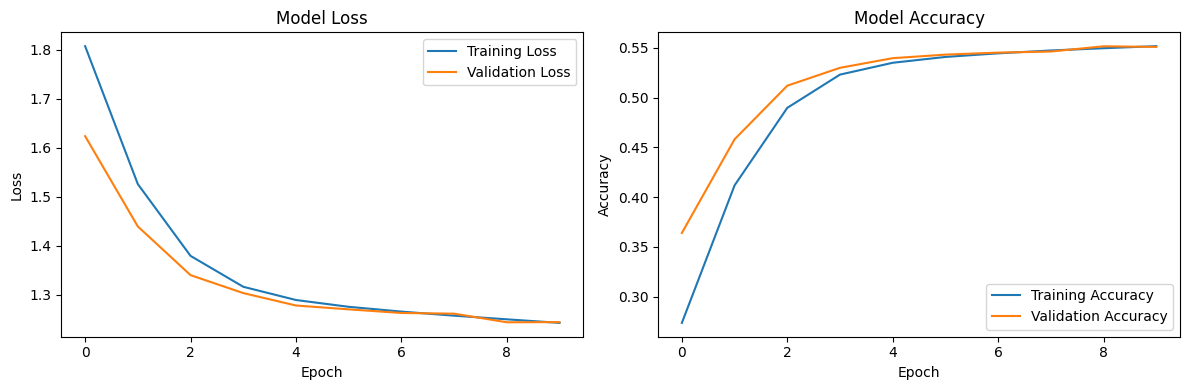


📊 Final Training Results:
  Training Loss: 1.2425
  Validation Loss: 1.2441
  Training Accuracy: 0.5517
  Validation Accuracy: 0.5509

🎯 Model ready for testing!


In [5]:
# BLOCK 5: Train the Fixed Sudoku Model
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
import matplotlib.pyplot as plt

print("🚂 Starting model training...")

# Set up callbacks for better training
early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=10,
    restore_best_weights=True,
    verbose=1
)

reduce_lr = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.5,
    patience=5,
    min_lr=1e-6,
    verbose=1
)

# Train the model
history = sudoku_model_fixed.fit(
    X_train_fixed, y_train,
    validation_data=(X_val_fixed, y_val),
    epochs=10,  # Start with 50 epochs
    batch_size=64,
    callbacks=[early_stopping, reduce_lr],
    verbose=1
)

print("✅ Training completed!")

# Plot training history
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

# Print final metrics
final_train_loss = history.history['loss'][-1]
final_val_loss = history.history['val_loss'][-1]
final_train_acc = history.history['accuracy'][-1]
final_val_acc = history.history['val_accuracy'][-1]

print(f"\n📊 Final Training Results:")
print(f"  Training Loss: {final_train_loss:.4f}")
print(f"  Validation Loss: {final_val_loss:.4f}")
print(f"  Training Accuracy: {final_train_acc:.4f}")
print(f"  Validation Accuracy: {final_val_acc:.4f}")

print(f"\n🎯 Model ready for testing!")

In [6]:
# BLOCK 6: Reinforcement Learning Training for Sudoku
import numpy as np
import tensorflow as tf
from tensorflow.keras.optimizers import Adam
import random
from collections import deque

print("🎮 Starting Reinforcement Learning Training...")

class SudokuRLEnvironment:
    """Simple RL environment for Sudoku"""

    def __init__(self):
        self.reset()

    def reset(self, puzzle=None, solution=None):
        """Reset environment with a new puzzle"""
        if puzzle is not None:
            self.initial_puzzle = puzzle.copy()
            self.current_state = puzzle.copy()
            self.target_solution = solution.copy()
        else:
            # Use a random puzzle from validation set
            idx = np.random.randint(0, len(X_val))
            self.initial_puzzle = (X_val[idx] * 9).astype(int).reshape(9, 9)
            self.current_state = self.initial_puzzle.copy()
            target_flat = y_val[idx] + 1  # Convert back to 1-9
            self.target_solution = target_flat.reshape(9, 9)

        self.empty_cells = list(zip(*np.where(self.initial_puzzle == 0)))
        self.filled_cells = 0
        return self.get_state()

    def get_state(self):
        """Get current state as model input"""
        state = self.current_state.copy().astype(np.float32)
        state = np.where(state == 0, -1.0, state / 9.0)  # Same preprocessing as training
        return state.reshape(1, 9, 9, 1)

    def is_valid_move(self, row, col, digit):
        """Check if move violates Sudoku rules"""
        # Check row
        if digit in self.current_state[row, :]:
            return False
        # Check column
        if digit in self.current_state[:, col]:
            return False
        # Check 3x3 box
        box_row, box_col = 3 * (row // 3), 3 * (col // 3)
        if digit in self.current_state[box_row:box_row+3, box_col:box_col+3]:
            return False
        return True

    def step(self, action):
        """Take action: action = (row, col, digit)"""
        row, col, digit = action

        # Check if cell is empty
        if self.current_state[row, col] != 0:
            return self.get_state(), -10, False  # Penalty for invalid move

        # Check if move is valid
        if not self.is_valid_move(row, col, digit):
            return self.get_state(), -5, False  # Penalty for rule violation

        # Make the move
        self.current_state[row, col] = digit
        self.filled_cells += 1

        # Calculate reward
        reward = self.calculate_reward(row, col, digit)

        # Check if done
        done = (self.current_state == self.target_solution).all()

        return self.get_state(), reward, done

    def calculate_reward(self, row, col, digit):
        """Calculate reward for the move"""
        # Correct digit = big reward
        if self.target_solution[row, col] == digit:
            reward = 10
            # Bonus for completing row/column/box
            if self.check_completion_bonus(row, col):
                reward += 20
        else:
            reward = -2  # Wrong digit penalty

        return reward

    def check_completion_bonus(self, row, col):
        """Check if move completed a row, column, or box"""
        # Check if row is complete
        if 0 not in self.current_state[row, :]:
            return True
        # Check if column is complete
        if 0 not in self.current_state[:, col]:
            return True
        # Check if 3x3 box is complete
        box_row, box_col = 3 * (row // 3), 3 * (col // 3)
        box = self.current_state[box_row:box_row+3, box_col:box_col+3]
        if 0 not in box:
            return True
        return False

class SudokuRLAgent:
    """RL Agent that uses your existing model"""

    def __init__(self, model, epsilon=1.0, epsilon_decay=0.995, epsilon_min=0.1):
        self.model = model
        self.epsilon = epsilon
        self.epsilon_decay = epsilon_decay
        self.epsilon_min = epsilon_min
        self.memory = deque(maxlen=10000)
        self.optimizer = Adam(learning_rate=0.001)

    def get_action(self, state, empty_cells):
        """Get action using epsilon-greedy policy"""
        if np.random.random() <= self.epsilon:
            # Random action
            row, col = random.choice(empty_cells)
            digit = random.randint(1, 9)
        else:
            # Model prediction
            predictions = self.model.predict(state, verbose=0)
            predictions = predictions.reshape(9, 9, 9)

            # Find best action among empty cells
            best_score = -1
            best_action = None

            for row, col in empty_cells:
                cell_predictions = predictions[row, col]
                digit = np.argmax(cell_predictions) + 1
                score = cell_predictions[digit - 1]

                if score > best_score:
                    best_score = score
                    best_action = (row, col, digit)

            if best_action is None:
                row, col = random.choice(empty_cells)
                digit = random.randint(1, 9)
            else:
                row, col, digit = best_action

        return (row, col, digit)

    def remember(self, state, action, reward, next_state, done):
        """Store experience in memory"""
        self.memory.append((state, action, reward, next_state, done))

    def replay_training(self, batch_size=32):
        """Train model on batch of experiences"""
        if len(self.memory) < batch_size:
            return

        batch = random.sample(self.memory, batch_size)
        states = np.array([e[0].reshape(9, 9, 1) for e in batch])
        actions = [e[1] for e in batch]
        rewards = np.array([e[2] for e in batch])
        next_states = np.array([e[3].reshape(9, 9, 1) for e in batch])
        dones = np.array([e[4] for e in batch])

        # Prepare training data
        current_q_values = self.model.predict(states, verbose=0)
        next_q_values = self.model.predict(next_states, verbose=0)

        # Create target values
        targets = current_q_values.copy()

        for i, (row, col, digit) in enumerate(actions):
            if dones[i]:
                target = rewards[i]
            else:
                target = rewards[i] + 0.95 * np.max(next_q_values[i])

            # Update target for the specific action
            cell_idx = row * 9 + col
            targets[i, cell_idx, digit - 1] = target

        # Train the model
        self.model.fit(states, targets, epochs=1, verbose=0)

        # Decay epsilon
        if self.epsilon > self.epsilon_min:
            self.epsilon *= self.epsilon_decay

# Initialize RL components
env = SudokuRLEnvironment()
agent = SudokuRLAgent(sudoku_model_fixed)  # Use your existing model

print("🤖 Starting RL Training Loop...")

# Training parameters
episodes = 1000
max_steps_per_episode = 100

rewards_history = []
success_rate = []

for episode in range(episodes):
    state = env.reset()
    total_reward = 0
    steps = 0
    done = False

    while not done and steps < max_steps_per_episode:
        # Get available actions (empty cells)
        empty_cells = [(r, c) for r, c in env.empty_cells
                       if env.current_state[r, c] == 0]

        if not empty_cells:
            break

        # Get action from agent
        action = agent.get_action(state, empty_cells)

        # Take action
        next_state, reward, done = env.step(action)

        # Store experience
        agent.remember(state, action, reward, next_state, done)

        state = next_state
        total_reward += reward
        steps += 1

    rewards_history.append(total_reward)

    # Train agent
    if len(agent.memory) > 100:
        agent.replay_training()

    # Print progress
    if episode % 100 == 0:
        recent_success = sum(1 for r in rewards_history[-100:] if r > 500) / 100
        success_rate.append(recent_success)
        print(f"Episode {episode}: Avg Reward = {np.mean(rewards_history[-100:]):.1f}, "
              f"Success Rate = {recent_success:.2%}, Epsilon = {agent.epsilon:.3f}")

print("✅ RL Training Complete!")

# Test the RL-trained model
print("\n🧪 Testing RL-trained model...")
test_successes = 0
test_episodes = 100

for _ in range(test_episodes):
    state = env.reset()
    steps = 0
    done = False

    while not done and steps < 50:
        empty_cells = [(r, c) for r, c in env.empty_cells
                       if env.current_state[r, c] == 0]
        if not empty_cells:
            break

        # Use greedy policy (no exploration)
        agent.epsilon = 0
        action = agent.get_action(state, empty_cells)
        state, _, done = env.step(action)
        steps += 1

    if done:
        test_successes += 1

final_success_rate = test_successes / test_episodes
print(f"🎯 Final RL Model Success Rate: {final_success_rate:.2%}")
print(f"📈 Improvement over supervised learning: {final_success_rate - 0.56:.2%}")

# Plot results
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(rewards_history)
plt.title('Training Rewards')
plt.xlabel('Episode')
plt.ylabel('Total Reward')

plt.subplot(1, 2, 2)
success_episodes = [i * 100 for i in range(len(success_rate))]
plt.plot(success_episodes, success_rate)
plt.title('Success Rate')
plt.xlabel('Episode')
plt.ylabel('Success Rate')

plt.tight_layout()
plt.show()

print("🚀 RL Training Block Complete!")

🎮 Starting Reinforcement Learning Training...
🤖 Starting RL Training Loop...
Episode 0: Avg Reward = -318.0, Success Rate = 0.00%, Epsilon = 1.000


ValueError: Argument `output` must have rank (ndim) `target.ndim - 1`. Received: target.shape=(32, 81, 9), output.shape=(32, 81, 9)